<center>
<h4>Diplomatura AACSyA 2018 - FaMAF - UNC</h4>
<h1>Aprendizaje No Supervisado</h1>
<h2>Práctico 1 - Clustering - Punto 2</h2>
<hr>
Por David Gonzalez <leonardo.david.gonzalez@gmail.com> y Facundo Díaz Cobos <facundo.diaz.cobos@gmail.com>
</center>
<br/>

## Objetivos
En este práctico se explorarán diferentes soluciones de clustering, para desarrollar las capacidades de análisis de
soluciones de clustering. Es preferible que los conjuntos de datos con los que trabajar sean propios, ya que de esta
forma podrán aplicar su conocimiento del dominio en la interpretación de las diferentes soluciones. Alternativa-
mente, pueden usar conjuntos de datos de los ejemplos de la materia.
En los mismos, hacer una breve discusión del problema y explicar cómo puede ser útil usar técnicas de clustering.

# Consignas
Para cumplir los objetivos, realizar las siguientes actividades:

1 - Explorar soluciones con diferentes parámetros y compararlas. Por ejemplo, variar el número de clusters, las
métricas de distancia, el número de iteraciones o el número de veces que se inicializan las semillas. Describir
brevemente: número de clusters, población de cada cluster, algunas caracterı́sticas distintivas de cada cluster,
algunos elementos que se puedan encontrar en cada cluster.

2 - Incorporar un embedding como preproceso a los datos, aplicar los algoritmos de clustering después de ese
preproceso y describir la solución o soluciones resultantes, discutiendo las ventajas que resultan. Se pueden
usar:

◦ Principal
Component Analysis http://scikit-learn.org/stable/modules/generated/sklearn.
decomposition.PCA.html

◦ para texto, embeddings neuronales Gensim https://pypi.org/project/gensim/

◦ para texto, embeddings neuronales Fastext https://pypi.org/project/fasttext/

3 - Proponer (y en lo posible, implementar) métricas de evaluación de soluciones de clustering basadas en testigos.
Los testigos son pares de objetos que un experto de dominio etiqueta como “deberı́an estar en el mismo cluster”
o “deberı́an estar en distintos clusters”.

4 - El método k-means de scikit-learn no provee una forma sencilla de obtneer los objetos más cercanos al centroide
de un cluster. Proponga alguna forma de obtener una muestra de los elementos de un cluster que sean cercanos
al centroide, por ejemplo, usando clasificadores, usando distancia coseno, etc. En lo posible, implementarlos y
mostrar esos elementos, discutir la representatividad de los elementos encontrados.

# <u>RESOLUCIÓN</u>

# Importando los datos:
Vamos a trabajar un set de datos correspondiente a compras reales de clientes realizadas en el año 2017. Los clientes fueron anonimizados previamente para poder ser utilizados en el ejercicio.

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from yellowbrick.cluster.elbow import KElbowVisualizer
from sklearn.cluster import KMeans
from datetime import datetime
from IPython.display import display, HTML

import numpy as np
np.random.seed(0)

# Configuramos el tamaño de los gráficos, en pulgadas
from pylab import rcParams
rcParams['figure.figsize'] = 18, 10

# 2 - Incorporar un embedding como preproceso a los datos:

Intentaremos hacer una reducción de dimensionalidad mediante PCA:


In [2]:
import pandas as pd
ppcp_log_norm = pd.read_pickle('datos/clustering/punto1/datos-normalizados.pkl')
ppcp_log_norm.head()

CODIGO_ARTICULO                  000-000-0236                                \
MONTH                                      1         2         3         4    
CODIGO_CLIENTE                                                                
0024531e81828540871212e10c896d71    -0.693147 -0.693147 -0.693147 -0.693147   
003c44afe6e90ba8848dfd2bdd92c03f    -0.693147 -0.693147 -0.693147 -0.693147   
004a4de5dd7ab3c72b8f86fe635bb9b8    -0.693147 -0.693147 -0.693147 -0.693147   
00a1e834d044753f4e47964143a5e904    -0.693147 -0.693147 -0.693147 -0.693147   
00bb302b07a498a606e061579e962c45    -0.693147 -0.693147 -0.693147 -0.693147   

CODIGO_ARTICULO                                                           \
MONTH                                   5         6         7         8    
CODIGO_CLIENTE                                                             
0024531e81828540871212e10c896d71 -0.693147 -0.693147 -0.693147 -0.693147   
003c44afe6e90ba8848dfd2bdd92c03f -0.693147 -0.693147 -0.693147 -0.693147   
004a4de5dd7ab3c72b8f86fe635bb9b8 -0.693147 -0.693147 -0.693147 -0.693147   
00a1e834d044753f4e47964143a5e904 -0.693147 -0.693147 -0.693147 -0.693147   
00bb302b07a498a606e061579e962c45 -0.693147 -0.693147 -0.693147 -0.693147   

CODIGO_ARTICULO                            000-000-0241      ...       \
MONTH                                   9            1       ...        
CODIGO_CLIENTE                                               ...        
0024531e81828540871212e10c896d71 -0.693147    -0.693147      ...        
003c44afe6e90ba8848dfd2bdd92c03f -0.693147    -0.693147      ...        
004a4de5dd7ab3c72b8f86fe635bb9b8 -0.693147    -0.693147      ...        
00a1e834d044753f4e47964143a5e904 -0.693147    -0.693147      ...        
00bb302b07a498a606e061579e962c45 -0.693147    -0.693147      ...        

CODIGO_ARTICULO                  000-999-c11857           000-999-c3436  \
MONTH                                        10        11            8    
CODIGO_CLIENTE                                                            
0024531e81828540871212e10c896d71      -0.693147 -0.693147     -0.693147   
003c44afe6e90ba8848dfd2bdd92c03f      -0.693147 -0.693147     -0.693147   
004a4de5dd7ab3c72b8f86fe635bb9b8      -0.693147 -0.693147     -0.693147   
00a1e834d044753f4e47964143a5e904      -0.693147 -0.693147     -0.693147   
00bb302b07a498a606e061579e962c45      -0.693147 -0.693147     -0.693147   

CODIGO_ARTICULO                                      000-999-c3747            \
MONTH                                   9         10            9         10   
CODIGO_CLIENTE                                                                 
0024531e81828540871212e10c896d71 -0.693147 -0.693147     -0.693147 -0.693147   
003c44afe6e90ba8848dfd2bdd92c03f -0.693147 -0.693147     -0.693147 -0.693147   
004a4de5dd7ab3c72b8f86fe635bb9b8 -0.693147 -0.693147     -0.693147 -0.693147   
00a1e834d044753f4e47964143a5e904 -0.693147 -0.693147     -0.693147 -0.693147   
00bb302b07a498a606e061579e962c45 -0.693147 -0.693147     -0.693147 -0.693147   

CODIGO_ARTICULO                            000-999-d4532 000-999-d5883  
MONTH                                   11            4             4   
CODIGO_CLIENTE                                                          
0024531e81828540871212e10c896d71 -0.693147     -0.693147     -0.693147  
003c44afe6e90ba8848dfd2bdd92c03f -0.693147     -0.693147     -0.693147  
004a4de5dd7ab3c72b8f86fe635bb9b8 -0.693147     -0.693147     -0.693147  
00a1e834d044753f4e47964143a5e904 -0.693147     -0.693147     -0.693147  
00bb302b07a498a606e061579e962c45 -0.693147     -0.693147     -0.693147  

[5 rows x 12807 columns]

In [3]:
ppcp_log_norm.describe()

CODIGO_ARTICULO 000-000-0236                                         \
MONTH                     1            2            3            4    
count            2443.000000  2443.000000  2443.000000  2443.000000   
mean               -0.692414    -0.690786    -0.692414    -0.692414   
std                 0.026276     0.054978     0.026276     0.026276   
min                -0.693147    -0.693147    -0.693147    -0.693147   
25%                -0.693147    -0.693147    -0.693147    -0.693147   
50%                -0.693147    -0.693147    -0.693147    -0.693147   
75%                -0.693147    -0.693147    -0.693147    -0.693147   
max                 0.405465     0.916291     0.405465     0.405465   

CODIGO_ARTICULO                                                      \
MONTH                     5            6            7            8    
count            2443.000000  2443.000000  2443.000000  2443.000000   
mean               -0.692130    -0.691563    -0.691846    -0.690502   
std                 0.035780     0.035759     0.032906     0.056727   
min                -0.693147    -0.693147    -0.693147    -0.693147   
25%                -0.693147    -0.693147    -0.693147    -0.693147   
50%                -0.693147    -0.693147    -0.693147    -0.693147   
75%                -0.693147    -0.693147    -0.693147    -0.693147   
max                 0.693147     0.405465     0.405465     0.916291   

CODIGO_ARTICULO              000-000-0241      ...      000-999-c11857  \
MONTH                     9            1       ...                  10   
count            2443.000000  2443.000000      ...         2443.000000   
mean               -0.690856    -0.669155      ...           -0.683248   
std                 0.052297     0.233931      ...            0.107758   
min                -0.693147    -0.693147      ...           -0.693147   
25%                -0.693147    -0.693147      ...           -0.693147   
50%                -0.693147    -0.693147      ...           -0.693147   
75%                -0.693147    -0.693147      ...           -0.693147   
max                 0.916291     3.198673      ...            2.525729   

CODIGO_ARTICULO              000-999-c3436                            \
MONTH                     11            8            9            10   
count            2443.000000   2443.000000  2443.000000  2443.000000   
mean               -0.692697     -0.683565    -0.681207    -0.685159   
std                 0.022227      0.109297     0.132253     0.090394   
min                -0.693147     -0.693147    -0.693147    -0.693147   
25%                -0.693147     -0.693147    -0.693147    -0.693147   
50%                -0.693147     -0.693147    -0.693147    -0.693147   
75%                -0.693147     -0.693147    -0.693147    -0.693147   
max                 0.405465      1.871802     2.525729     0.916291   

CODIGO_ARTICULO 000-999-c3747                           000-999-d4532  \
MONTH                      9            10           11            4    
count             2443.000000  2443.000000  2443.000000   2443.000000   
mean                -0.690758    -0.685571    -0.689961     -0.690331   
std                  0.068162     0.151060     0.096403      0.066850   
min                 -0.693147    -0.693147    -0.693147     -0.693147   
25%                 -0.693147    -0.693147    -0.693147     -0.693147   
50%                 -0.693147    -0.693147    -0.693147     -0.693147   
75%                 -0.693147    -0.693147    -0.693147     -0.693147   
max                  1.252763     4.283587     3.198673      1.504077   

CODIGO_ARTICULO 000-999-d5883  
MONTH                      4   
count             2443.000000  
mean                -0.685895  
std                  0.141410  
min                 -0.693147  
25%                 -0.693147  
50%                 -0.693147  
75%                 -0.693147  
max                  3.526361  

[8 rows x 12807 columns]

In [4]:
# Primero obtenemos la matriz de correlacion 
df_corr = ppcp_log_norm.corr()

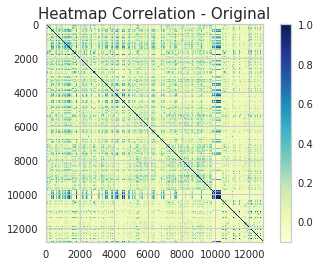

In [5]:
# Lo vemos en el gráfico:
plt.title('Heatmap Correlation - Original',fontsize=15)
plt.imshow(df_corr, cmap=plt.cm.get_cmap("YlGnBu"), interpolation="nearest")
plt.colorbar()
plt.show()

## Revisión 1: Obtener la cantidad de features indicando el porcentaje de varianza

In [6]:
# Aqui podemos ver que algunas features tiene mucha correlacion entre si
# Por lo que vamos a aplicar una técnica de embedding, PCA (Principal component analisis)
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca = PCA(.99)
pca.fit(ppcp_log_norm)
df_reduced_99_pca = pca.transform(ppcp_log_norm)

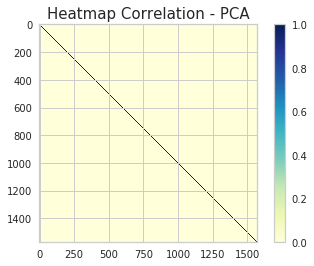

In [7]:
# Vamos a volver a generar otro mapa de calor, par ver si la correlacion bajo y el PCA fue efectivo.
df_red_99 =  pd.DataFrame(data=df_reduced_99_pca, columns=range(df_reduced_99_pca.shape[1]))
#Generamos un nuevo mapa de calor para ver corroborar que la correlacion entre columnas es baja!
df_red_99_corr = df_red_99.corr()
# Lo vemos en el gráfico:
plt.title('Heatmap Correlation - PCA',fontsize=15)
plt.imshow(df_red_99_corr, cmap=plt.cm.get_cmap("YlGnBu"), interpolation="nearest")
plt.colorbar()
plt.show()

In [8]:
# Obtenemos la cantidad de features que mantienen el 99% de la información
HTML(str(df_red_99.shape[1]) + ' features')

## Revisión 2: Obtener la cantidad de features analizando la relación de varianza

In [9]:
# Detección de cantida de features minima que nos dé la mayor varianza
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Entrenamos con todos los features
n_features = ppcp_log_norm.shape[0]

covar_matrix = PCA(n_components = n_features) 
covar_matrix.fit(ppcp_log_norm)
variance = covar_matrix.explained_variance_ratio_ #calculate variance ratios

var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
var # cumulative sum of variance explained with [n] features


array([20.3, 24.6, 27.9, ..., 85. , 85. , 85. ])

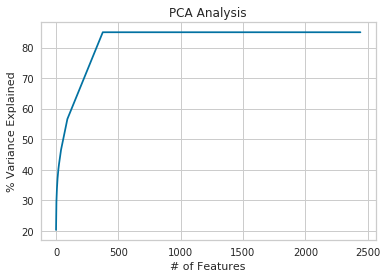

In [10]:
# Visualizamos en un grafico:
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.plot(var)
plt.show()

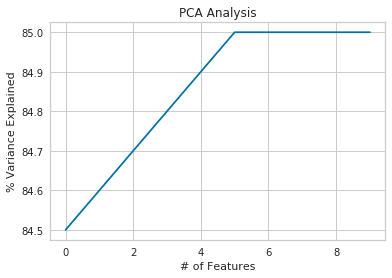

In [11]:
# El valor de corte está entre los 370 y 380 feature. Analizamos mas de cerca para ver el punto de corte.
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')

plt.plot(var[370:380])
plt.show()

La gráfica nos muestra que luego de 375 features no mejora la variance. Tomamos esa cantidad para entrenar PCA.

In [12]:
# Aqui podemos ver que algunas features tiene mucha correlacion entre si
# Por lo que vamos a aplicar una técnica de embedding, PCA (Principal component analisis)
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca = PCA(n_components=375)
pca.fit(ppcp_log_norm)
df_reduced_pca = pca.transform(ppcp_log_norm)
# Vamos a volver a generar otro mapa de calor, par ver si la correlacion bajo y el PCA fue efectivo.
df_red =  pd.DataFrame(data=df_reduced_pca, columns=range(df_reduced_pca.shape[1]))

In [13]:
display(df_red.head())
display(df_red.tail())

,0,1,2,3,4,5,6,7,8,9,...,365,366,367,368,369,370,371,372,373,374
0,7.858838,3.501325,-7.541234,4.308636,11.689131,-2.679837,-2.548821,-2.407483,2.056680,7.542843,...,-1.436532,0.414004,2.592668,-2.963727,-2.464378,-5.346266,1.446058,2.236540,3.057572,1.085716
1,35.478210,2.241110,-22.853997,2.040594,-3.620116,1.384941,-8.773052,-3.240172,10.990062,7.545141,...,1.904534,1.739965,0.915344,-1.812511,-3.269357,0.381839,-0.750337,-2.344576,2.503673,-0.312782
2,24.978170,-12.392510,-3.543426,3.476948,-2.465785,17.145688,-9.715849,-9.284736,-3.891494,9.346109,...,-0.517528,0.512309,-0.342866,0.199345,0.436243,-0.607686,0.235895,1.358498,-3.495661,1.273837
3,-6.695409,6.545776,-3.235297,-5.538498,2.494653,3.231334,-0.155245,0.856498,-3.241343,0.778495,...,0.276507,-1.112032,0.328707,0.953540,-1.383334,1.873402,0.868425,0.382813,-0.581519,1.173539
4,-0.367483,-0.277243,-9.258876,-2.290705,3.340271,-5.510914,-4.212161,-5.339205,1.978774,-2.659129,...,0.613235,0.597762,-0.566961,1.227028,0.401975,-0.150480,-0.415684,1.863548,0.886450,-0.414369


,0,1,2,3,4,5,6,7,8,9,...,365,366,367,368,369,370,371,372,373,374
2438,-17.799590,3.102016,4.902102,-1.663923,0.994497,0.168389,0.161273,-0.804471,0.276771,-0.216757,...,0.215142,-0.377258,-0.002540,0.009155,0.065186,0.040390,-0.055160,0.299991,0.047586,-0.075898
2439,-18.139274,3.022606,4.661425,-1.219002,1.593064,0.296943,-0.043139,-0.353293,0.717089,-0.399669,...,0.002429,0.062309,0.070461,0.169210,0.031194,0.437761,-0.087776,0.119794,0.104112,0.519400
2440,-18.103381,3.863437,5.382084,-1.427628,1.246464,-0.027959,0.059692,-0.190488,-0.300745,-0.497106,...,0.200833,-0.176016,-0.048381,-0.031374,0.217746,-0.037481,-0.093985,-0.281129,0.001647,0.161463
2441,16.598640,-8.386542,-8.128672,9.922994,8.229448,0.945650,1.787237,0.309342,-2.782795,-4.073878,...,5.793211,-1.475288,2.645888,-1.449075,-0.151270,-2.366537,1.040708,3.854137,-0.546674,0.224826
2442,12.228575,-3.471719,-16.153480,6.210573,-7.759319,2.334456,5.057685,2.917398,0.704915,10.121456,...,0.020563,0.061768,1.508162,-1.103627,-0.670282,-2.148255,-0.410088,-2.004237,1.222794,0.500629


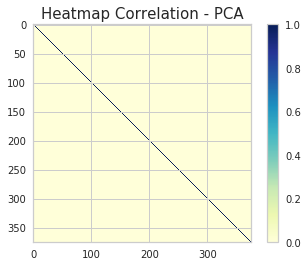

In [14]:
#Generamos un nuevo mapa de calor para ver corroborar que la correlacion entre columnas es baja!
# y efectivamente este metodo nos ayudo a reducir dimencionalidad sin tanta perdida de informacion
# ya que ahora estamos en otro espacio, sin tanta perdida de informacion
df_red_corr = df_red.corr()

# Lo vemos en el gráfico:
plt.title('Heatmap Correlation - PCA',fontsize=15)
plt.imshow(df_red_corr, cmap=plt.cm.get_cmap("YlGnBu"), interpolation="nearest")
#plt.imshow(df_corr, cmap=plt.cm.get_cmap("Reds"), interpolation="nearest")
plt.colorbar()
plt.show()

In [15]:
HTML(str(df_red.shape[1]) + ' features')

## Clusterizamos el resultado:
Trabajamos ahora con las columnas detectadas y reclusterizamos para ver si mejora la distribución:

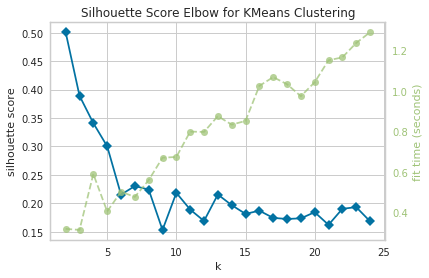

In [16]:
# Clusterizamos los clientes segun la similaridad de los productos que compran
plt.clf()
clusterClientes = KElbowVisualizer(KMeans(), k=(2,25), metric='silhouette',random_state=3425)
clusterClientes.fit(df_red)
clusterClientes.poof()
plt.show()

Ok, probamos con 15 clusters:

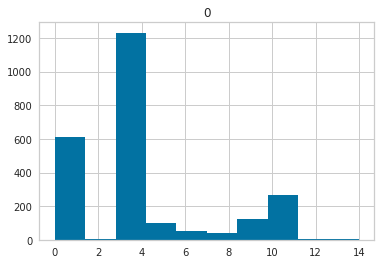

In [17]:
num_clusters = 15

# Ejecutamos la clusterización por la cantidad de clusters seleccionada:
ppcp_kmeans = KMeans(n_clusters=num_clusters,random_state=3425)

ppcp_clusters = ppcp_kmeans.fit_predict(df_red)

pd.DataFrame(ppcp_clusters).hist()
plt.show()


Probamos tambine con 6:

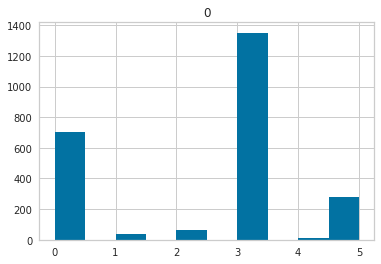

In [18]:
num_clusters = 6

# Ejecutamos la clusterización por la cantidad de clusters seleccionada:
ppcp_kmeans = KMeans(n_clusters=num_clusters,random_state=3425)

ppcp_clusters = ppcp_kmeans.fit_predict(df_red)

pd.DataFrame(ppcp_clusters).hist()
plt.show()


In [19]:
unique, counts = np.unique(ppcp_clusters, return_counts=True)


In [20]:
display(HTML('<H1># CLIENTES POR CLUSTER</H1>'))
clusters_info_df = pd.DataFrame( np.transpose([np.array(range(len(counts))), counts]), columns=['CLUSTER', 'CANTIDAD_CLIENTES'])
clusters_info_df

,CLUSTER,CANTIDAD_CLIENTES
0,0,703
1,1,38
2,2,61
3,3,1351
4,4,10
5,5,280


Se observa que los valores de distribución son parecidos a los del punto 1. 

# Persistimos los resultados obtenidos

In [21]:
import os
persist_directory = 'datos/clustering/punto2/'
if not os.path.exists(persist_directory):
    os.makedirs(persist_directory)

Dividimos el notebook para simplificar sus ejecuciones. Guardamos entonces los datos procesados para utilizar en los siguientes notebooks: 

In [22]:
df_red.to_pickle('datos/clustering/punto2/datos-reducidos-pca.pkl')

In [23]:
pd.DataFrame(ppcp_clusters).to_pickle('datos/clustering/punto2/clusters.pkl')